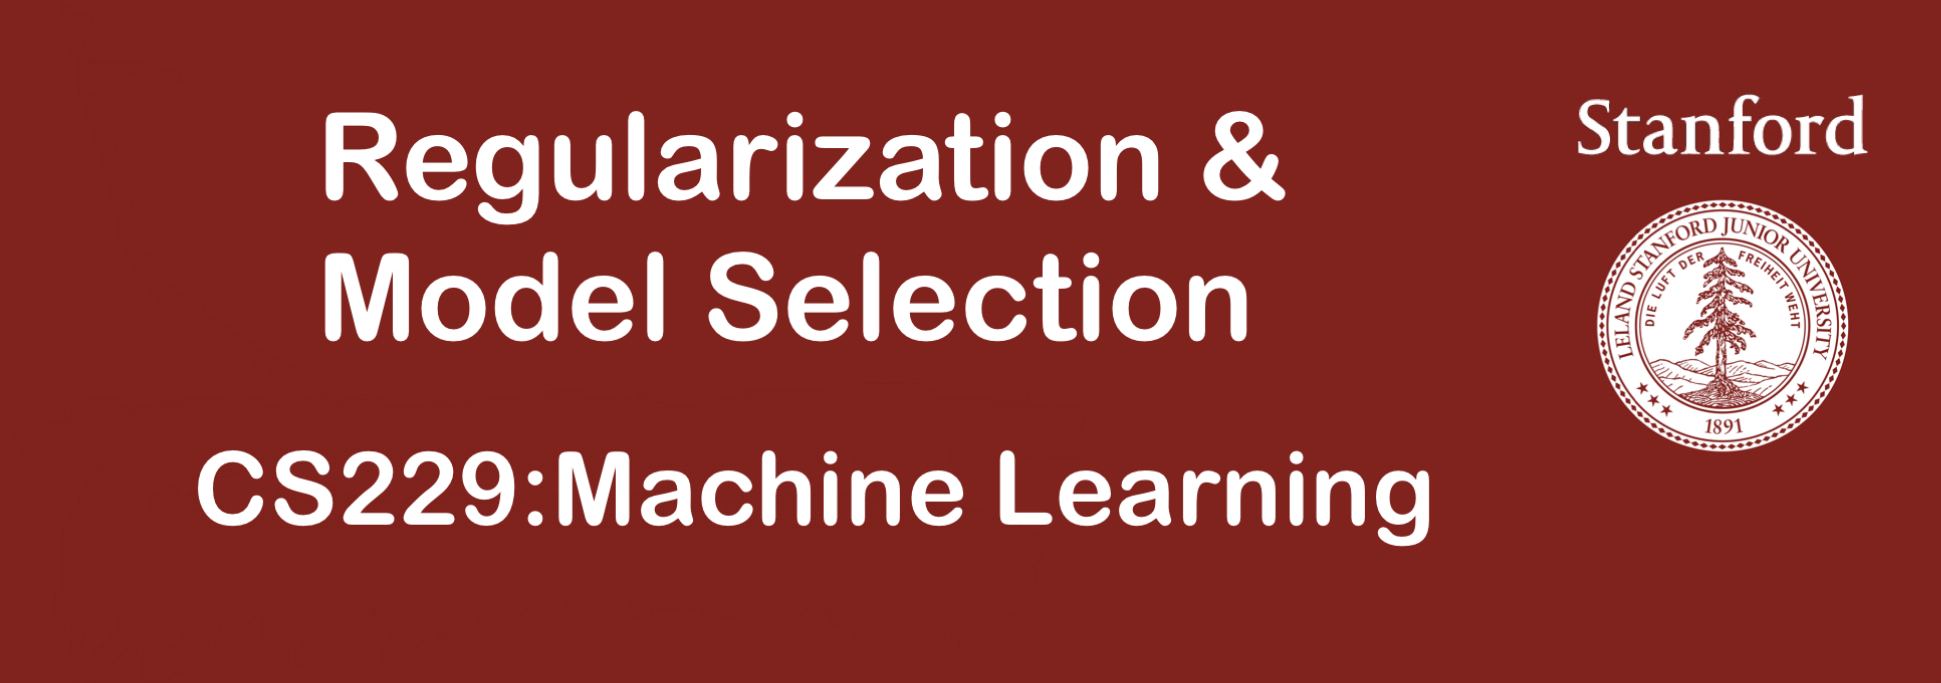

## 1. 模型选择

对于一个学习问题，我们可能有多种模型可以选择，例如：

* 多项式回归中的不同项数对应的模型

* 局部加权回归中不同带宽参数对应的模型

* L1 正则化支持向量机中的不同参数 $C$ 对应的模型

我们希望可以自动选择一个权衡方差与偏差最好的模型。为了更加具体，本节所讨论的模型集合为 **「有限集」** $\mathcal{M}={\mathcal{M_1},...,\mathcal{M_d}}$，向无限集的推广并不难。该模型集合可以是一系列类似的模型（如不同项数的多项式模型），也可以是完全不同的模型（如 SVM、神经网络或逻辑回归）。

## 2. 交叉验证

给定一个训练集 $S$，基于经验风险最小化，我们可以考虑如下的算法进行模型选择：

1. 在 $S$ 上训练每个模型 $M_i$，得到每个模型对应的假设 $h_i$

2. 选择具有最小训练误差的假设

很遗憾，上述算法并不会工作。以多项式模型为例，其项数越高，对训练集的拟合越好，因此上述算法一定会选出高项数且高方差的模型，这并不是一个好的选择。

下面给出一个可以工作的算法：**「保留交叉验证(hold-out cross validation)」**

1. 随机将训练集 $S$ 分为 $S_{train}$（通常用 70% 的数据）和 $S_{cv}$（剩余的 30%）。$S_{cv}$ 称为 **「保留交叉验证集」**

2. 仅在 $S_{train}$ 上训练每个模型 $M_i$，得到其对应的假设 $h_i$

3. 选择在保留交叉验证集上误差（$\hat{\epsilon_{S_{cv}}}(h_i)$）最小的假设 $h_i$ 作为输出

通过在模型没有训练的 $S_{cv}$ 上进行测试，我们可以更好地估计假设 $h_i$ 的真实泛化误差。

上述算法的第三步也可以用如下方法替代：根据保留交叉验证集选择选择出模型后，再使用全部训练集对模型进行训练。这通常是一个好的主意，除非算法对于数据的初始状态十分敏感，即可能在 $S_{cv}$ 上的训练表现会很差。

保留交叉验证集的缺点是其浪费了很多数据（30%）。虽然我们可以使用全部训练集重新训练模型，但我们仍然只使用了 70% 的数据来找到一个好的模型。如果数据量较大，那么这并没有什么问题，但是如果数据量很小的话，我们应该考虑其他的算法。

下面给出 **「k 保留交叉验证(k-fold cross validation)」方法**，这种方法每次保留更少的数据用于验证：

1. 随机将 $S$ 分为 $k$ 个互斥的子集，每个子集中含有 $m/k$ 个训练样本，我们称之为子集 $S_1,...,S_k$

2. 对于每个模型 $M_i$，按照如下步骤进行分析:$\text{For} \quad j=1,...,k$，在除去子集 $S_j$ 上的训练集上训练每个模型，得到对应的假设 $h_{ij}$；在 $S_j$ 上测试假设 $h_{ij}$，得到 $\hat{\epsilon_{S_j}}(h_{ij})$；模型 $M_i$ 的估计泛化误差通过求 $\hat{\epsilon_{S_j}}(h_{ij})$ 的平均得到

3. 选择具有最小估计泛化误差的模型 $M_i$，然后在整个训练集上重新训练，得出的结果即为我们的最终假设

与保留交叉验证相比，该方法需要训练每个模型 $k$ 次，计算代价更高。对于 $k$ 一个经典的选择是 $k=10$。在某些样本量很小的情况下，我们会选择 $k=m$，这种方法被称为 **「留一交叉验证(leave-one-out cross validation)」**。

虽然我们介绍各种不同的交叉验证作为模型选择的方法，但其也可以用来评估单个模型或算法的性能.

### 3. 特征选择

模型选择的一个特例是 **「特征选择(feature selection)」**。为了引出特征选择问题，假设我们有一个监督学习算法，其特征数量非常之大（$n \gg m$），但是你认为只有一小部分特征与学习任务相关。即便使用一个简单的线性分类器，假设的 VC 维也会是 $O(n)$，如果训练集不是特别大，很容易出现过拟合的问题。

因此，我们需要一个特征选择算法来减少特征的数量。给定 $n$ 个特征，总共有 $2^n$ 种可能的子集（每个特征可选可不选），可以将其看作是一个包含 $2^n$ 种模型的模型选择问题。由于 $n$ 较大，因此遍历所有的模型代价过高，一般会采用一些「启发式」的搜索流程来找到好的特征子集。下面介绍两种启发式的特征选择算法：**「包装器特征选择(wrapper feature selection)」** 和 **「过滤器特征选择(filter feature selection)」**。

#### 3.1 包装器特征选择

包装器特征选择可以分为 **「前向搜索」** 与 **「后向搜索」** 两种。前向搜索的流程如下：

1. 初始化 $\mathcal{F}=\varnothing$

2. 重复：对于 $i=1,...,n$，如果 $i \notin \mathcal{F}$，令 $\mathcal{F}_i=\mathcal{F}\cup \{i\}$，使用某种交叉验证来评估特征集 $\mathcal{F}_i$($i \in \mathcal{F}$时不评估）。将 $\mathcal{F}$ 设为上一步骤（遍历一次）中表现最佳的特征子集

3. 选择整个搜索过程中表现最佳的特征子集输出

第二步中循环的结束条件可以是当 $\mathcal{F}=\{1,...,n\}$ 为整个特征集，也可以指定一个特征数量的上界。后向搜索与前向搜索类似，只是其初始值为 $\mathcal{F}=\{1,...,n\}$，然后逐步减少特征数量。

包装器特征选择算法通常效果较好，但是相对来说计算代价较高。完整的前向搜索过程会进行约 $O(n^2)$次学习算法的调用。

#### 3.2 过滤器特征选择

相比之下，过滤器特征选择算法的计算代价很小。算法思想是计算每个特征 $x_i$ 对其类别标签 $y$ 所能体现的信息量 $S(i)$，然后选择得分最高的 $k$ 个特征作为特征集。一般将 $S(i)$ 定义为 $x_i$ 与 $y$ 之间的相关程度（基于训练集计算）。

实践中通过 $x_i$ 与 $y$ 之间的 **「互信息(mutual information)」** 来计算 $S_i$：

$$MI(x,y)=\sum_{x_i \in \{0,1\}}\sum_{y_i\in \{0,1\}}p(x_i,y)log\frac{p(x_i,y)}{p(x_i)p(y)}$$

这里假设 $x_i$ 和 $y$ 都是二元分类。上式中的概率值都基于训练集来估计。

为了更好的理解互信息，可以将其表示成 **「KL 散度(Kullback-Leibler divergence)」**

$$MI(x_i,y)=KL(p(x_i,y)\parallel p(x_i)p(y))$$

KL 散度表明 $p(x_i,y)$ 与 $p(x_i)p(y)$ 的不同程度。如果 $x_i$ 和 $y$ 独立同分布，那么我们有 $p(x_i,y)=p(x_i)p(y)$，其 KL 散度为 0。

当你得到所有的 $S(i)$ 并排序完成后，应该如何选择 $k$ ？一个标准的方法是使用交叉验证来在 $k$ 的可能选项中选择。

### 4. 贝叶斯统计与正则化

本部分将介绍对抗过拟合的另外一个工具。之前我们介绍了基于最大似然法的参数拟合，其公式如下：

$$\theta_{ML}=\underset{\theta}{\text{argmax}}\prod){i=1}^m p(y^{(i)}|x^{(i)};\theta)$$

我们将 $\theta$ 看作一个「未知常量」，而并不是一个随机变量，这是一种「频率学派」的观点。从「贝叶斯学派」的角度，我们将 $\theta$ 看作一个「未知的随机变量」，指定一个 $\theta$ 的先验分布 $p(\theta)$。

给定一个训练集 $S=\{x^{(i)},y^{(i)}\}_{i=1}^m$，我们可以先计算参数的后验分布：

$$p(\theta|S)=\frac{p(S|\theta)p(\theta)}{p(S)}=\frac{(\prod_{i=1}^m p(y^{(i)}|x^{(i)}))p(\theta)}{\int_{\theta}(\prod_{i=1}^m p(y^{(i)}|x^{(i)},\theta)p(\theta))d\theta}$$

注意这里使用了逗号而不是分号（表明 $\theta$ 是一个随机变量）。 $p(y^{(i)}|x^{(i)},\theta)$ 根据你使用的模型来决定。当要预测一个新的 $x$ 的输出时，我们可以基于 $\theta$ 的后验分布来计算分类标签的后验分布：

$$p(y|x,S)=\int_{\theta}p(y|x,\theta)p(\theta|S)d\theta$$

因此，预测的输出（对离散型变量为求和）为：

$$E[y|x,S]=\int_y yp(y|x,S)dy$$

上述过程是完整的贝叶斯预测，但是实际上该后验分布是很难计算的（因为 $\theta$ 的积分计算难以求出闭合解/解析解）。因此，实际应用中我们会对 $\theta$ 的后验分布进行估计。

一个常用的估计方法是将后验分布使用一个单点估计来代替。对 $\theta$ 的「最大后验估计」（MAP）为：

$$\theta_{MAP}=\underset{\theta}{\text{argmax}}\prod_{i=1}^m p(y^{(i)}|x^{(i)},\theta)p(\theta)$$

和最大似然相比，只是末尾多了一项 $\theta$ 的先验分布 $p(\theta)$。在实际应用中，$p(\theta)$ 的一个常用选择是 $\theta \sim \mathcal{N}(0,\gamma^2 I)$。

与最大似然相比，拟合出的参数将具有更小的范数，从而使得贝叶斯 MAP 更「易于避免过拟合」。例如，对于文本分类问题，虽然 $n \gg m $，贝叶斯逻辑回归仍然是一个比较高效的算法。我们可以将贝叶斯 MAP 看作是在最大似然的公式里加入了一个惩罚项，以防止参数过拟合。